Always need to download and prepar the data

In [1]:
import piplite
await piplite.install(['openpyxl==3.0.9', 'seaborn'])

import numpy as np
import pandas as pd
%matplotlib inline
from PIL import Image

In [7]:
from js import fetch
import io

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(url)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name = 'Canada by Citizenship',
    skiprows = range(20),
    skipfooter = 2)

print('data downloaded and read into a dataframe')

data downloaded and read into a dataframe


In [8]:
print(df_can.shape)

(195, 43)


In [9]:
# clean up the data
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [16]:
# rename columns
# drop columns
# change data to srtings

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace =True)
df_can.drop(['AREA','REG','DEVName','Type','Coverage'], axis=1, inplace=True)
df_can.columns= list(map(str, df_can.columns))


<class 'KeyError'>: "['AREA', 'REG', 'DEVName', 'Type', 'Coverage'] not found in axis"

In [17]:
# set the dataframe to Country
# add a total column summing up immagrants

df_can.set_index('Country',inplace=True)
df_can['Total'] = df_can.sum(axis=1)

<class 'KeyError'>: "None of ['Country'] are in the columns"

In [18]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [20]:
years = list(map(str, range(1980, 2014)))
print('data dimaensions:', df_can.shape)

data dimaensions: (195, 38)


## Visualizing DATA Matplotlib

In [23]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # need this for waffle charts

mpl.style.use('ggplot') # optional for ggplot

print('matplotlib version:', mpl.__version__) #>2.0

matplotlib version: 3.5.1


## Waffle Charts

is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [25]:
# create a new data frame for these countries

df_dns = df_can.loc[['Denmark', 'Norway','Sweden'],:]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [26]:
# when creating a waffle chart you need to determine the proportion of each category

#compute the proportion of each category with respect to the total
total_values = df_dns['Total'].sum()
category_proportions = df_dns['Total'] / total_values

#print out propoertions
pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [27]:
# defing the overall size of the waffle

width = 40
height = 10

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles},')

Total number of tiles is 400,


In [28]:
# use the proportions of each category to determine it respective number of tiles

tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [32]:
# creating the matrix that results the waffle chart 
waffle_chart = np.zeros((height,width), dtype = np.uint)

#define indicies
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index +=1
        
        # if the number of tiles populated for the current category is equal to the corresponding allocated ties
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index +=1
            
            # set teh class value to an interger, which increases with class
            waffle_chart[row, col] = category_index
            
        print('Waffle chart populated')


Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle chart populated
Waffle char

In [33]:
waffle_chart

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-34-329143d6c1da>:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


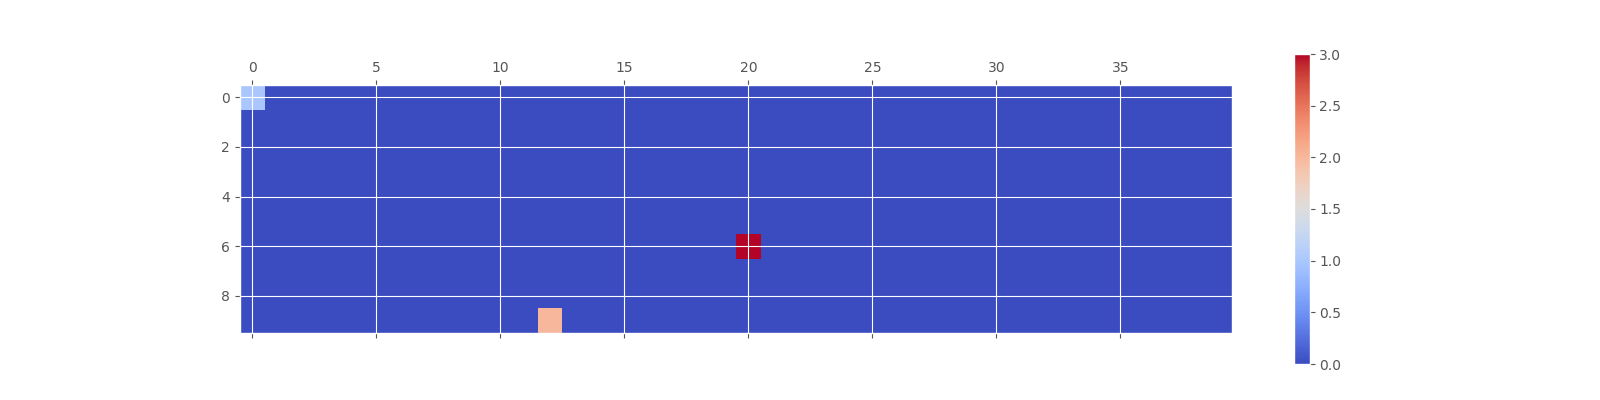

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [34]:
# map the waffle chart 

fig= plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<ipython-input-36-b03291df7014>:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


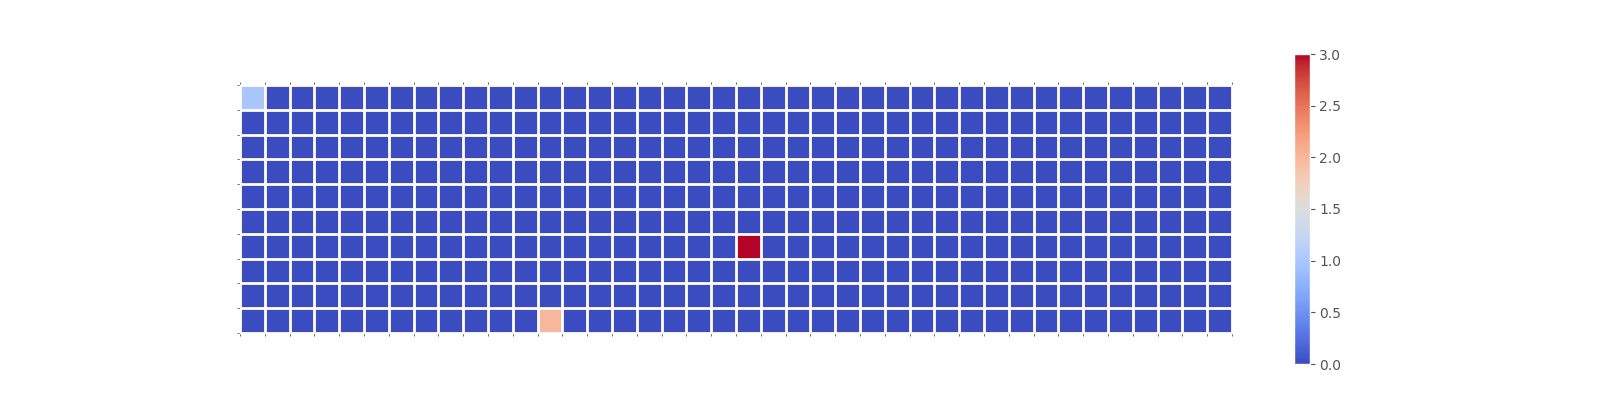

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [36]:
# put in a new figure object

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<ipython-input-38-2e6c8576164d>:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


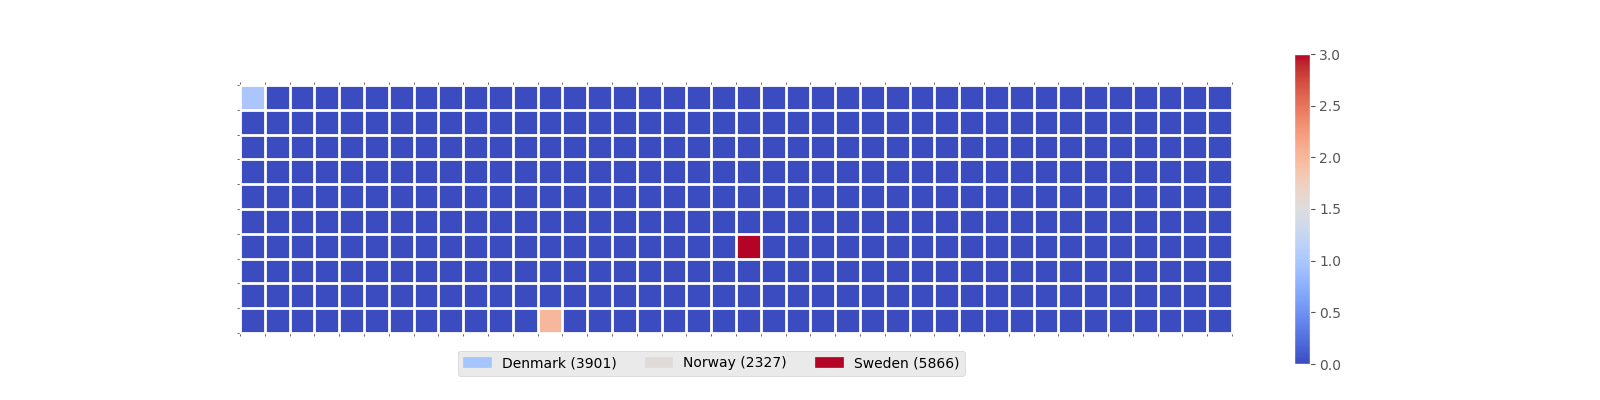

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [38]:
## Creat a Legend


# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

# Regresson Plots/Lines 

In [39]:
# install seaborn

import seaborn as sns

print('seaborn is downloaded')

seaborn is downloaded


In [44]:
# create a new dataframe that store that total number of landed immagrants to canada

# use sum() method to get the total population
df_total = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to float
df_total.index = list(map(float, df_total.index))

# reset the index to put in back in as a column in the df_total dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns= ['Year', 'Total']

df_total.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<function pyolite.patches.patch_matplotlib.<locals>.show(close=None, block=None)>

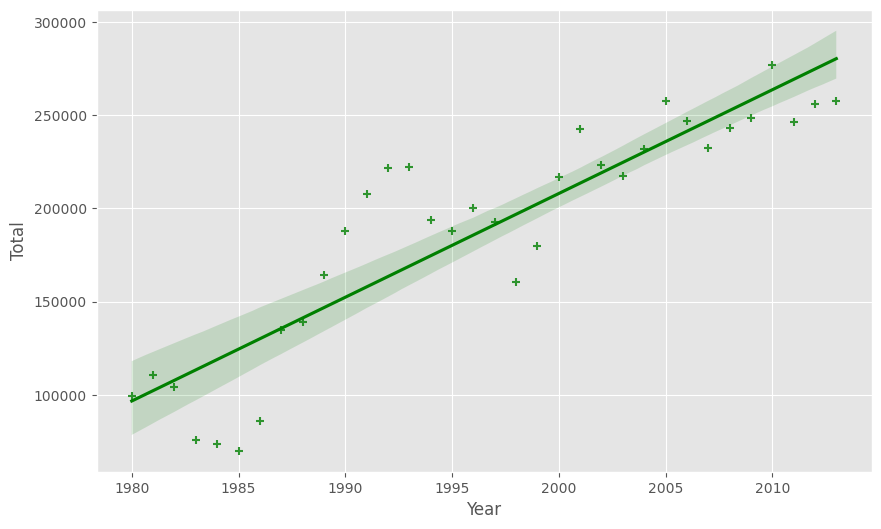

In [47]:
# generate a regression plot


plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Total', data=df_total, color ='green', marker ='+')
plt.show

<function pyolite.patches.patch_matplotlib.<locals>.show(close=None, block=None)>

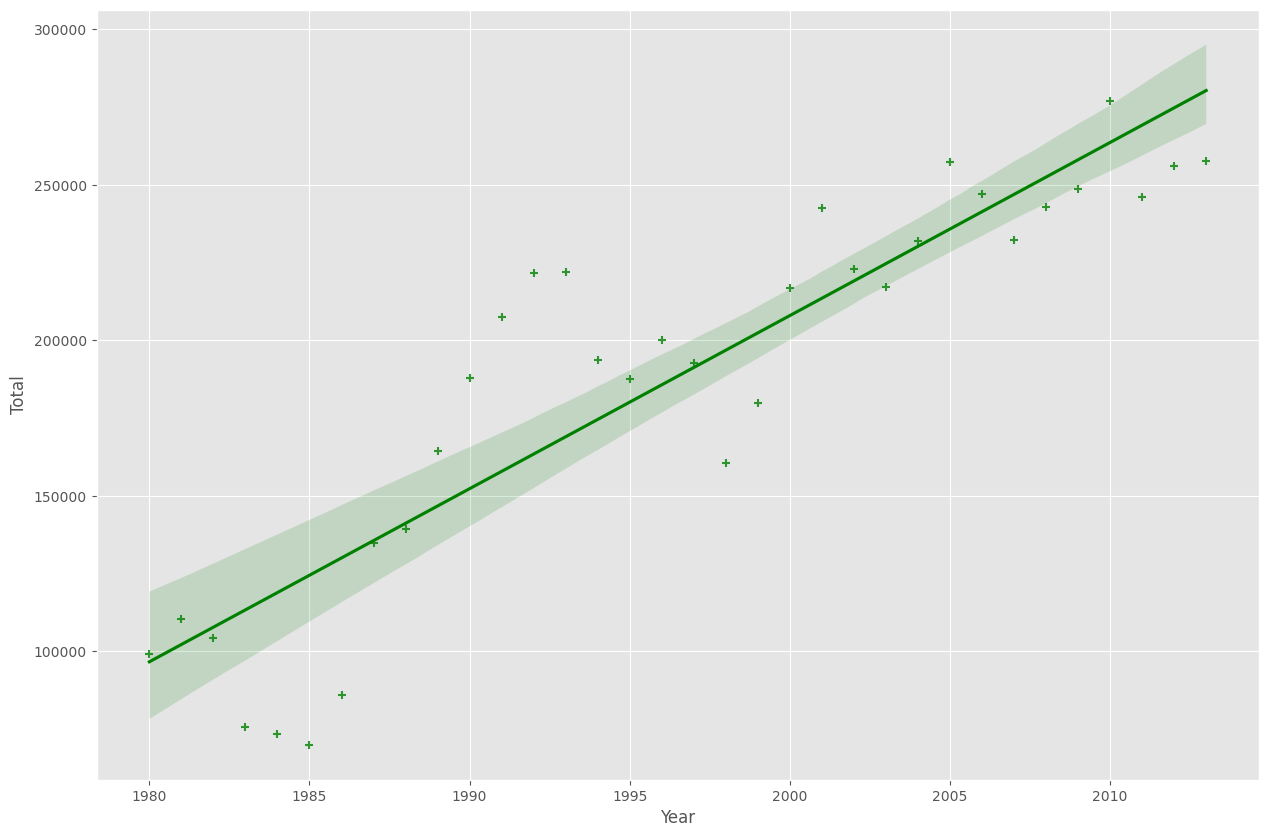

In [48]:
# Increasing the size of the markers

plt.figure(figsize=(15,10))
sns.regplot(x='Year', y='Total', data=df_total, color ='green', marker ='+')
plt.show

<AxesSubplot:xlabel='Year', ylabel='Total'>

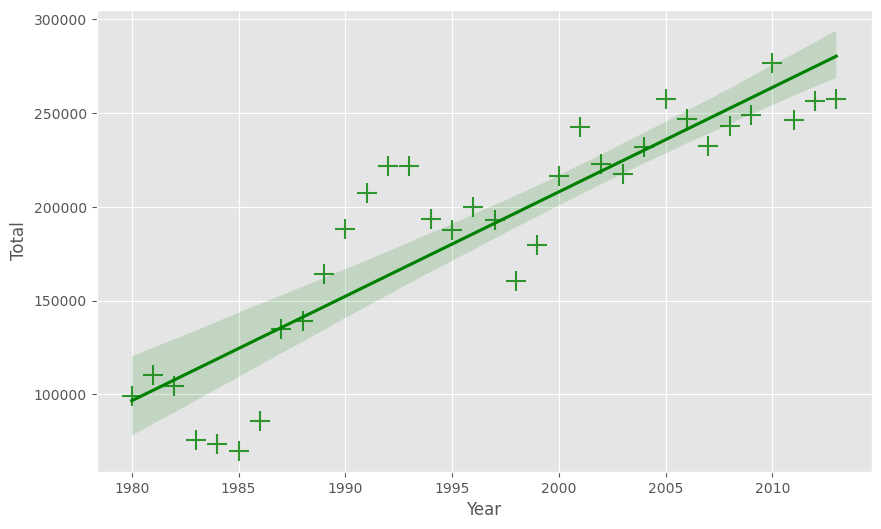

In [52]:
# increase the size of the markers

plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Total', data=df_total, color ='green', marker ='+', scatter_kws={'s': 200})

 

<function pyolite.patches.patch_matplotlib.<locals>.show(close=None, block=None)>

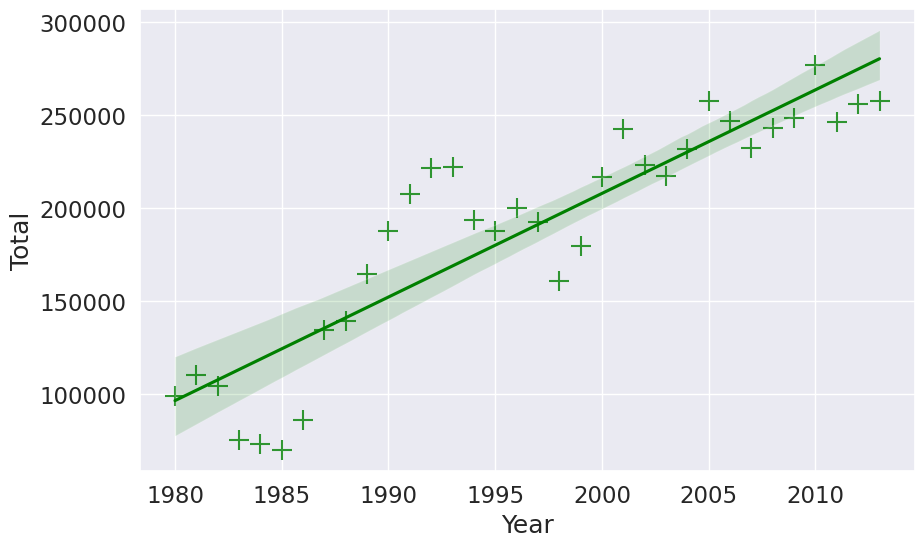

In [55]:
# increase font scale

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.regplot(x='Year', y='Total', data=df_total, color ='green', marker ='+', scatter_kws={'s': 200})
plt.show

<function pyolite.patches.patch_matplotlib.<locals>.show(close=None, block=None)>

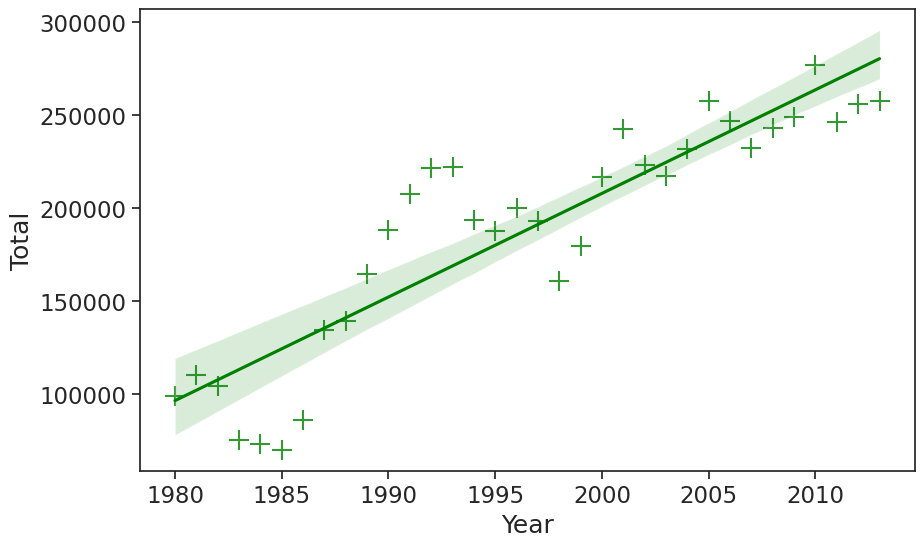

In [58]:
# Changing the background

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style('ticks') # you can use ticks, whitegrid, 
sns.regplot(x='Year', y='Total', data=df_total, color ='green', marker ='+', scatter_kws={'s': 200})
plt.show

In [60]:
years = list(map(str, range(1980, 2013)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

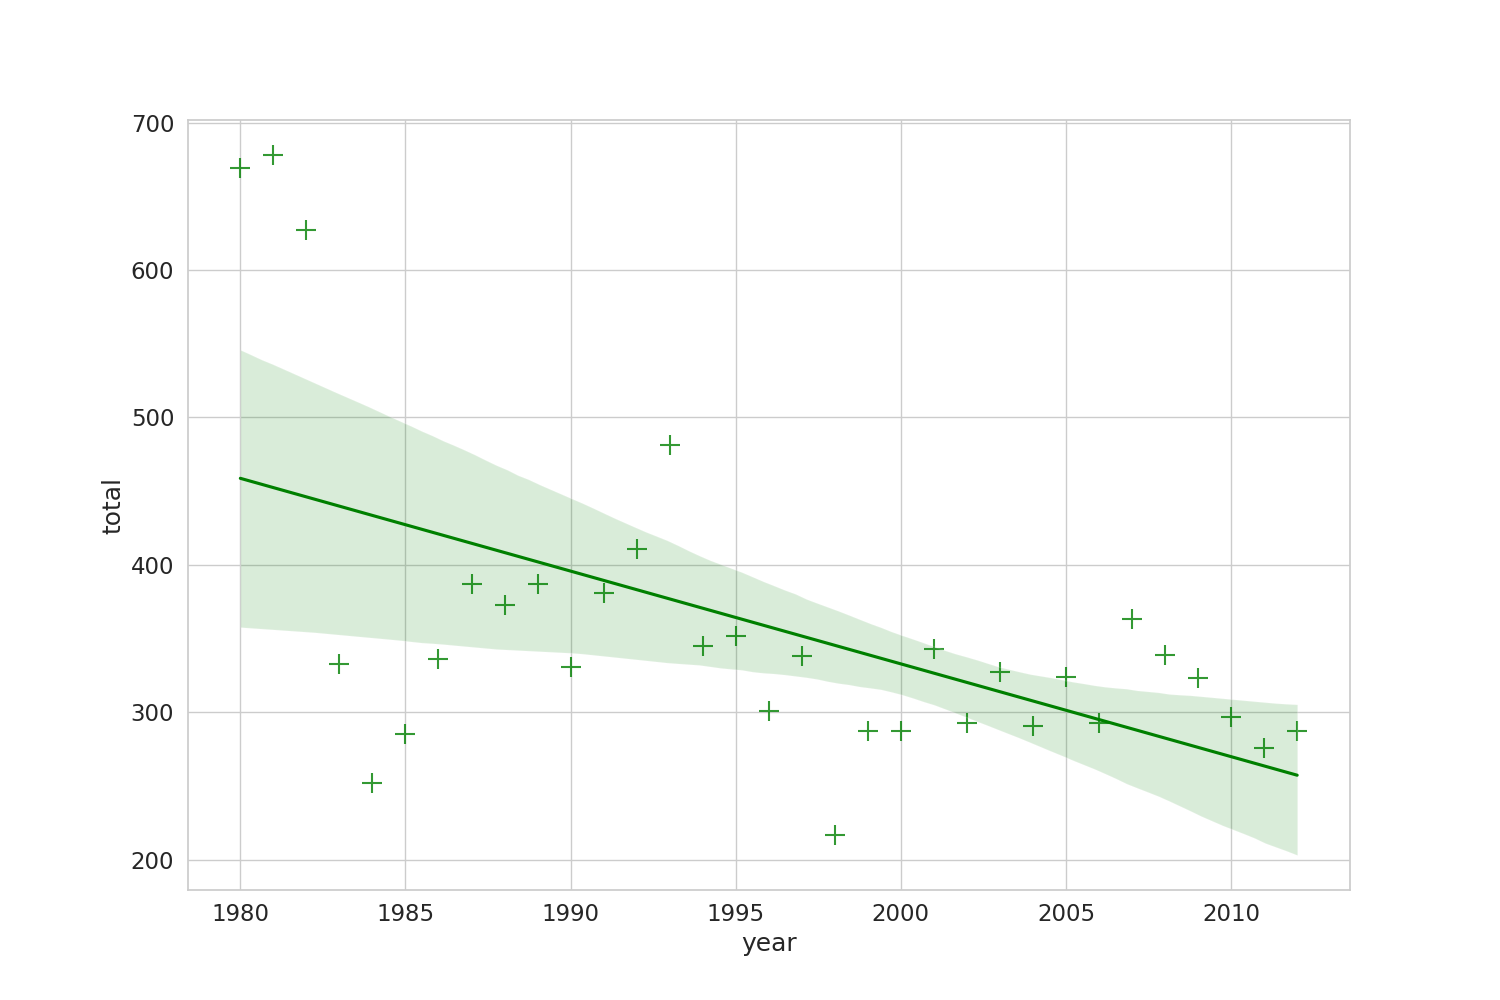

<Figure size 1500x1000 with 0 Axes>

In [80]:
  # create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
df_total.reset_index(inplace=True)

    # rename columns
df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

    # define figure size
plt.figure(figsize=(15, 10))

    # define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

    # generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    
plt.show()